# Predict H1N1 and Seasonal Flu Vaccines

## 1.1 Business Understanding

Vaccination is one of the most effective public health strategies for preventing the spread of infectious diseases. However, vaccine uptake varies across populations due to factors such as personal beliefs, risk perception, health behaviors, and access to healthcare. This project uses data from the 2009 H1N1 Flu Survey, conducted during the swine flu pandemic, to explore patterns in H1N1 and seasonal flu vaccine uptake. The dataset includes demographic, social, and behavioral variables which aid model vaccination behavior.

Random Forest models were developed to predict whether individuals received the H1N1 or seasonal flu vaccine. Hyperparameter tuning was applied to optimize performance, and key metrics such as accuracy, AUC, precision, recall, and F1-score were evaluated. The analysis links demographic and behavioral factors to vaccination outcomes, providing insights that can inform public health strategies and improve vaccine coverage.

### Problem Statement

The goal of this project is to predict whether an individual received the H1N1 or seasonal flu vaccine using demographic, social, behavioral, and opinion-based data from the 2009 H1N1 Flu Survey. The dataset includes two target variables:

h1n1_vaccine: 0 = Did not receive H1N1 vaccine and 1 = Received H1N1 vaccine
seasonal_vaccine: 0 = Did not receive seasonal flu vaccine and 1 = Received seasonal flu vaccine

### Objectives

1. Predict H1N1 and seasonal flu vaccination using demographic factors, social behavioral features, and opinion-based features.

2. Identify top factors that influence vaccine intake.

3. Build and tune models to optimize predictive performance.

4. Evaluate model performance using accuracy, AUC, precision, recall, and F1-score.

5. Provide actionable insights that can meaningfully impact the health organizatios,  public health interventions and vaccination campaigns.

### Business Goal

The goal of this project is to provide actionable insights into vaccination behavior by predicting whether the respondents received the H1N1 or the seasonal flu vaccine. Further, the project will also help us understand  the factors that influence vaccine uptake. This information will be very helpul to the public health organizations, such as the WHO, in designing targeted interventions, improve vaccination campaigns, and ultimately increase coverage to reduce the spread of infectious diseases.

### Data Science Goal 

The goal of this project is to predict whether individuals received the H1N1 or seasonal flu vaccine using demographic, social, behavioral, and opinion-based features from the 2009 H1N1 Flu Survey.Further, the  analysis aims to identify key factors that influence the vaccination behavior and optimize Random Forest models to achieve accurate and reliable predictions.

###  Metric of Success

The primary metric for evaluating the models is AUC, which measures the ability to distinguish between vaccinated and non-vaccinated individuals. Accuracy, precision, recall, and F1-score are used as supporting metrics to assess overall correctness and class-specific performance. These metrics ensure the models reliably predict vaccine uptake.

## 1.2 Data Understanding

In [137]:
#import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
from scipy import stats
warnings.filterwarnings("ignore")

#import sklearn libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, SMOTEN
from scipy.stats import randint
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
#Loading the datasets.
data1_train_features = pd.read_csv("training_set_features.csv")
data2_train_labels   = pd.read_csv("training_set_labels.csv")

print("Shape of train_features:", data1_train_features.shape)
print("Shape of train_labels:", data2_train_labels.shape)

Shape of train_features: (26707, 36)
Shape of train_labels: (26707, 3)


In [3]:
#Merging the 2 datasets. 
merged_data = pd.merge(data1_train_features, data2_train_labels , on="respondent_id")

#Lets check the head
merged_data[:7]

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,saaquncn,vlluhbov,0,0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,xicduogh,xtkaffoo,0,0


In [4]:
#Lets check the tail
merged_data.tail()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg,0,0
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",1.0,0.0,NaN,NaN,0,0


Observation: The dataset values are uniform from top to bottom. 

In [5]:
#The shape of the dataset
print(f" The dataset has {merged_data.shape[0]} records and {merged_data.shape[1]} columns")

 The dataset has 26707 records and 38 columns


In [6]:
#data types
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

The dataset has 23 numerical features stored as float64. Additionally, there are 3 integer columns including respondent_id which is an identifier and, h1n1_vaccine, and seasonal_vaccine which are the two are target variables.Further, there are 12 categorical columns including age_group, education, race, sex, and employment_industry.

In [7]:
#Statistical summary
merged_data.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000



The average mean of adults in household is  0.9 which shows that most respondents live alone or with one other adult.

The average mean of children in household is 0.53 which shows that many respondents have no children.

In [8]:
#Checking for unique values

for coln in merged_data:
    unique_value = merged_data[coln].unique()
    print(f" {coln}\n, {unique_value}\n")

 respondent_id
, [    0     1     2 ... 26704 26705 26706]

 h1n1_concern
, [ 1.  3.  2.  0. nan]

 h1n1_knowledge
, [ 0.  2.  1. nan]

 behavioral_antiviral_meds
, [ 0.  1. nan]

 behavioral_avoidance
, [ 0.  1. nan]

 behavioral_face_mask
, [ 0.  1. nan]

 behavioral_wash_hands
, [ 0.  1. nan]

 behavioral_large_gatherings
, [ 0.  1. nan]

 behavioral_outside_home
, [ 1.  0. nan]

 behavioral_touch_face
, [ 1.  0. nan]

 doctor_recc_h1n1
, [ 0. nan  1.]

 doctor_recc_seasonal
, [ 0. nan  1.]

 chronic_med_condition
, [ 0.  1. nan]

 child_under_6_months
, [ 0.  1. nan]

 health_worker
, [ 0.  1. nan]

 health_insurance
, [ 1. nan  0.]

 opinion_h1n1_vacc_effective
, [ 3.  5.  4.  2.  1. nan]

 opinion_h1n1_risk
, [ 1.  4.  3.  2.  5. nan]

 opinion_h1n1_sick_from_vacc
, [ 2.  4.  1.  5.  3. nan]

 opinion_seas_vacc_effective
, [ 2.  4.  5.  3.  1. nan]

 opinion_seas_risk
, [ 1.  2.  4.  3.  5. nan]

 opinion_seas_sick_from_vacc
, [ 2.  4.  1.  5. nan  3.]

 age_group
, ['55 - 64 Yea

Most features are binary, ordinal, or categorical. The target variables are binary. Some columns have many missing values. 

## 1.3 Data Preparation
### Data Cleaning

In [9]:
# Creating a copy of the data to be used in cleaning
data = merged_data.copy(deep=True)

In [10]:
data.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [11]:
#Checking for duplicates
data.duplicated().sum()

0

Observation : There are no duplicated rows in the dataset

In [12]:
#Dropping unnecessary columns
data.drop(["respondent_id" ], axis = 1, inplace = True)
data.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [13]:
#Checking for the null values.

data.isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [14]:
#Filling in the missing values of the categorical columns with "Unknown".
data["health_insurance"] = data["health_insurance"].fillna("Unknown")
data["employment_industry"] = data["employment_industry"].fillna("Unknown")
data["rent_or_own"] = data["rent_or_own"].fillna("Unknown")
data["marital_status"] = data["marital_status"].fillna("Unknown")
data["income_poverty"] = data["income_poverty"].fillna("Unknown")
data["employment_occupation"] = data["employment_occupation"].fillna("Unknown")
data["employment_status"] = data["employment_status"].fillna("Unknown")
data["education"] = data["education"].fillna("Unknown")

#Check for the nulls again.
data.isna().sum()

h1n1_concern                     92
h1n1_knowledge                  116
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_h1n1               2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
health_insurance                  0
opinion_h1n1_vacc_effective     391
opinion_h1n1_risk               388
opinion_h1n1_sick_from_vacc     395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
education                         0
race                              0
sex                               0
income_poverty                    0
marital_status                    0
rent_or_own                 

In [15]:
#Filling in the household counts with the median.
data["household_adults"] = data["household_adults"].fillna(data["household_adults"].median())
data["household_children"] = data["household_children"].fillna(data["household_children"].median())
data.isna().sum()

h1n1_concern                     92
h1n1_knowledge                  116
behavioral_antiviral_meds        71
behavioral_avoidance            208
behavioral_face_mask             19
behavioral_wash_hands            42
behavioral_large_gatherings      87
behavioral_outside_home          82
behavioral_touch_face           128
doctor_recc_h1n1               2160
doctor_recc_seasonal           2160
chronic_med_condition           971
child_under_6_months            820
health_worker                   804
health_insurance                  0
opinion_h1n1_vacc_effective     391
opinion_h1n1_risk               388
opinion_h1n1_sick_from_vacc     395
opinion_seas_vacc_effective     462
opinion_seas_risk               514
opinion_seas_sick_from_vacc     537
age_group                         0
education                         0
race                              0
sex                               0
income_poverty                    0
marital_status                    0
rent_or_own                 

For the household counts, I chose to use median because to typical values and to preserve the distribution.

In [16]:
#Filling in the Binary columns with zero
binary_columns = ["doctor_recc_h1n1", "doctor_recc_seasonal","health_worker", "chronic_med_condition","child_under_6_months",\
"doctor_recc_h1n1", "doctor_recc_seasonal","chronic_med_condition"]

#Fil in the columns with 0
for columns in binary_columns:
    data[columns]= data[columns].fillna(0)

data.isna().sum()

h1n1_concern                    92
h1n1_knowledge                 116
behavioral_antiviral_meds       71
behavioral_avoidance           208
behavioral_face_mask            19
behavioral_wash_hands           42
behavioral_large_gatherings     87
behavioral_outside_home         82
behavioral_touch_face          128
doctor_recc_h1n1                 0
doctor_recc_seasonal             0
chronic_med_condition            0
child_under_6_months             0
health_worker                    0
health_insurance                 0
opinion_h1n1_vacc_effective    391
opinion_h1n1_risk              388
opinion_h1n1_sick_from_vacc    395
opinion_seas_vacc_effective    462
opinion_seas_risk              514
opinion_seas_sick_from_vacc    537
age_group                        0
education                        0
race                             0
sex                              0
income_poverty                   0
marital_status                   0
rent_or_own                      0
employment_status   

In [17]:
# List of columns to fill with the mode
columns_mode = ["opinion_h1n1_vacc_effective","opinion_h1n1_risk","h1n1_concern","h1n1_knowledge",'opinion_h1n1_sick_from_vacc',\
'opinion_seas_vacc_effective', 'opinion_seas_risk','opinion_seas_sick_from_vacc', 'behavioral_outside_home','behavioral_touch_face',\
'behavioral_antiviral_meds','behavioral_avoidance',"behavioral_face_mask", "behavioral_wash_hands", "behavioral_large_gatherings"]

#Fill in with mode
#Fil in the columns with 0
for columns in columns_mode  :
    data[columns]= data[columns].fillna(data[columns].mode()[0])

#Check for the nulls again
data.isna().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa

In [18]:
#Check for duplicates. 
data.duplicated().sum()

#Drop the 1 Duplicate
data=data.drop_duplicates()
data.shape

(26706, 37)

In [19]:
data.shape

(26706, 37)

In [20]:
#Categorical columns
data.describe(include=['object', 'category'])


,health_insurance,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
count,26706.0,26706,26706,26706,26706,26706,26706,26706,26706,26706,26706,26706,26706
unique,3.0,5,5,4,2,4,3,3,4,10,3,22,24
top,1.0,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",Unknown,Unknown
freq,12696.0,6843,10097,21221,15858,12776,13554,18735,13559,4296,11644,13330,13470


## 1.4. Exploratory Data Analysis

### 1.4.1 Univariate Analysis

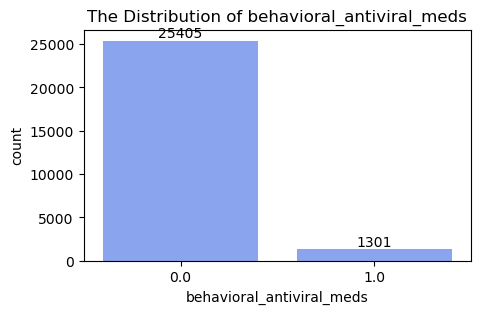

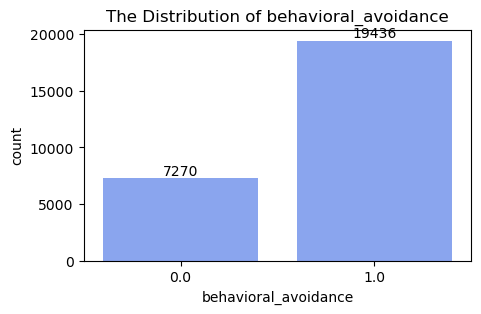

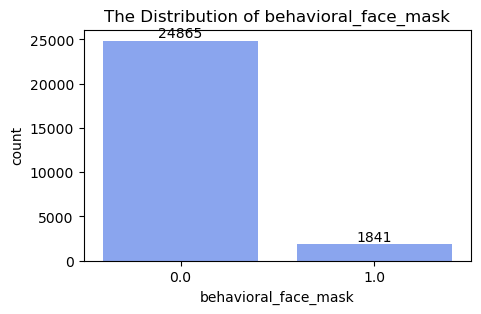

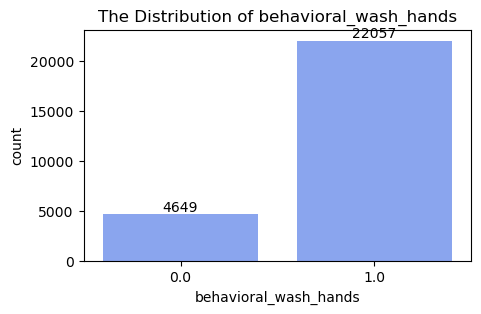

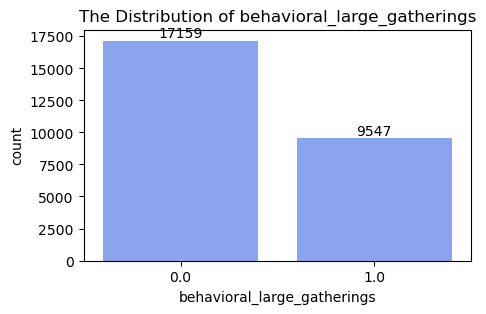

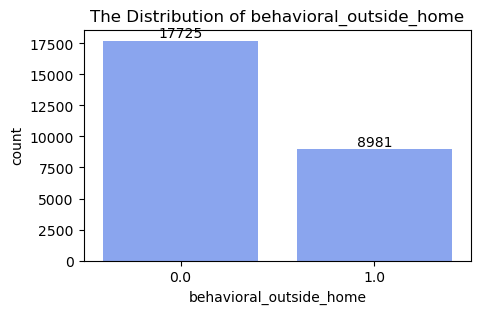

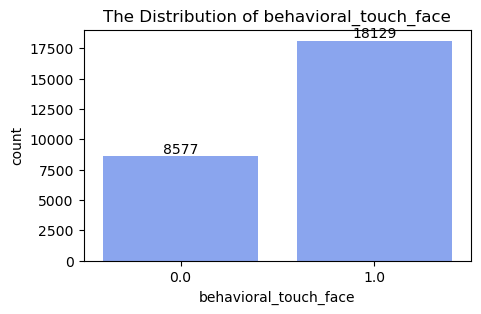

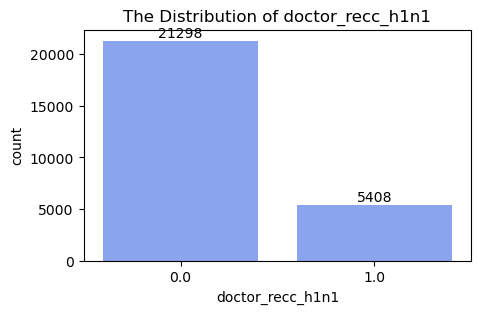

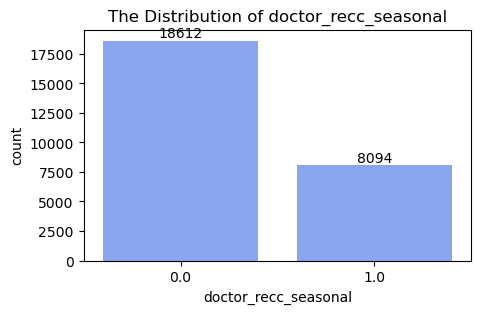

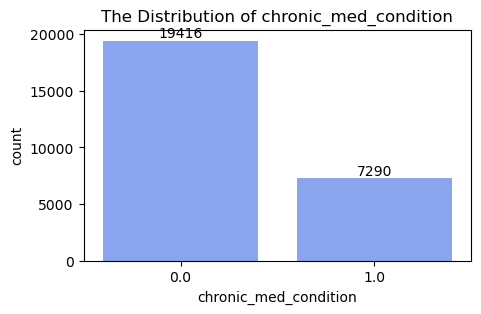

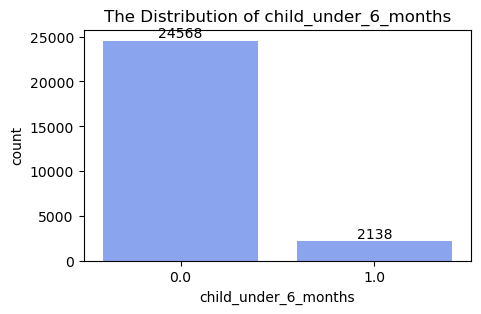

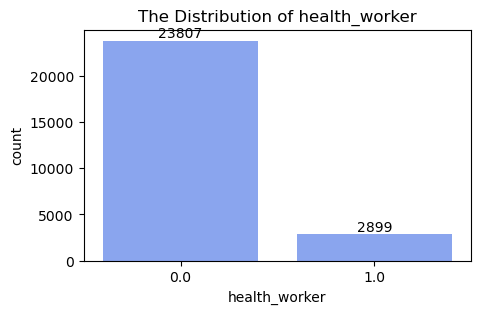

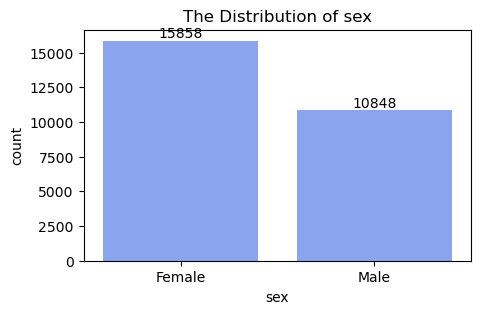

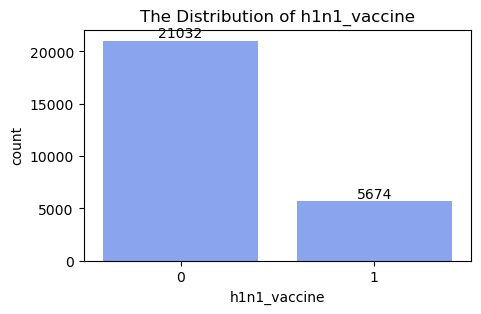

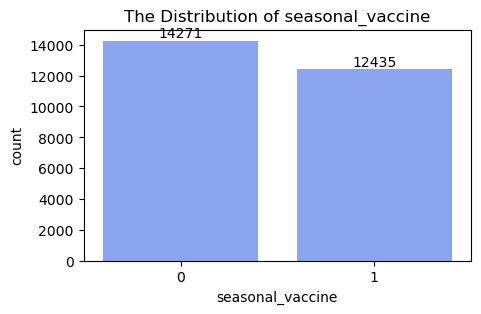

In [21]:
#For the Univariate Analysis, I started by plotting a bar graph for all the binary columns by creating a loop.

binary_columns = [column for column in data.columns if data[column].nunique() == 2]
for column in binary_columns:
    plt.figure(figsize=(5,3))
    barplot = sns.countplot(x=column, data=data, color = "#799EFF")
    plt.title(f"The Distribution of {column}")
    barplot.bar_label(barplot.containers[0])
    plt.show()

1. The behavioral_antiviral_meds bar plot shows that 25405(95.1%) respondents did not take antiviral medications while 1301(4.9%) respondents took  antiviral medications.
2. The behavioral_avoidance bar plot shows that 7270 (27.2%) respondents did not avoid people who might be sick while 19436 (72.8%) respondents did avoid people who might be sick.
3. The behavioral_face_mask bar plot shows that 24865 respondents did not wear a face mask while 1841 did wear a face mask.
4. The behavioral_wash_hands  count plot shows that 17.4% of the respondents did not wash their  hands frequently while 82.6% washed them frequently.
5. The behavioral_large_gatherings plot shows that 64.3% of the respondents did not avoid large gatherings while 35.7 % respondents avoided large large gatherings. 
6. The behavioral_outside_home shows that 66.4% of the respondents did not reduce time outside the home while 33.6%  did reduce their time outside the home.  
7. The behavioral_touch_face shows that 32.1% of the respondents did not avoid touching their face while 67.9% respondents avoided touching their face.
8. The doctor_recc_h1n1 plot  shows that the doctor did not recommend  H1N1 vaccine to the 
 79.7% of the respondents but did recommend the H1N1 vaccine to the 20.3 % of the respondents. 
9. The doctor_recc_seasonal plot shows that the  doctor did not  recommend seasonal flu vaccine to 69.7% of the respondents but recommended it to  30.3 % of the respondents. 
10. The chronic_med_condition plot shows that 72.7% of the respondents do not have a chronic medical condition while 27.3% do have a chronic medical condition. 
11. The child_under_6_months  plot shows that 92% of the respondents do not have a child who is under 6 months while 8% of the respondents do have a child under 6 months. 
12. The health_worker plot shows that 89.1% of the respondents do not work in healthcare, while 10.9% do work in healthcare.
13. The sex count plot shows that 59.4% of the respondents were female, while 40.6% were male. 
14. The H1N1 vaccine plot shows that 78.8% of the respondents did not receive the H1N1 vaccine, while 22.2% did receive the H1N1 vaccine. 
15. The seasonal_vaccine plot shows that 53.4% of the respondents did not receive the seasonal flu vaccine, while 46.6% received the seasonal flu vaccine.

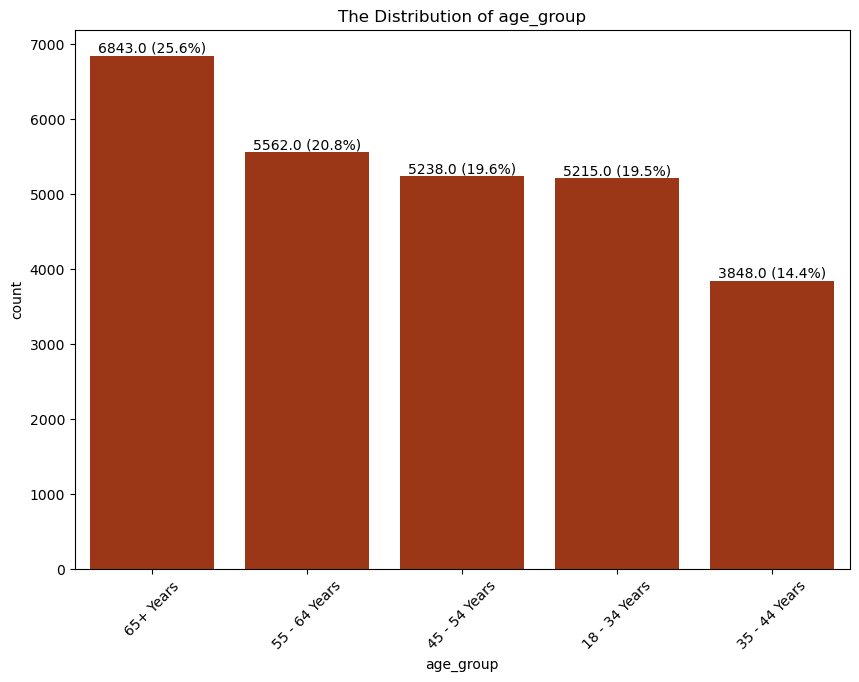

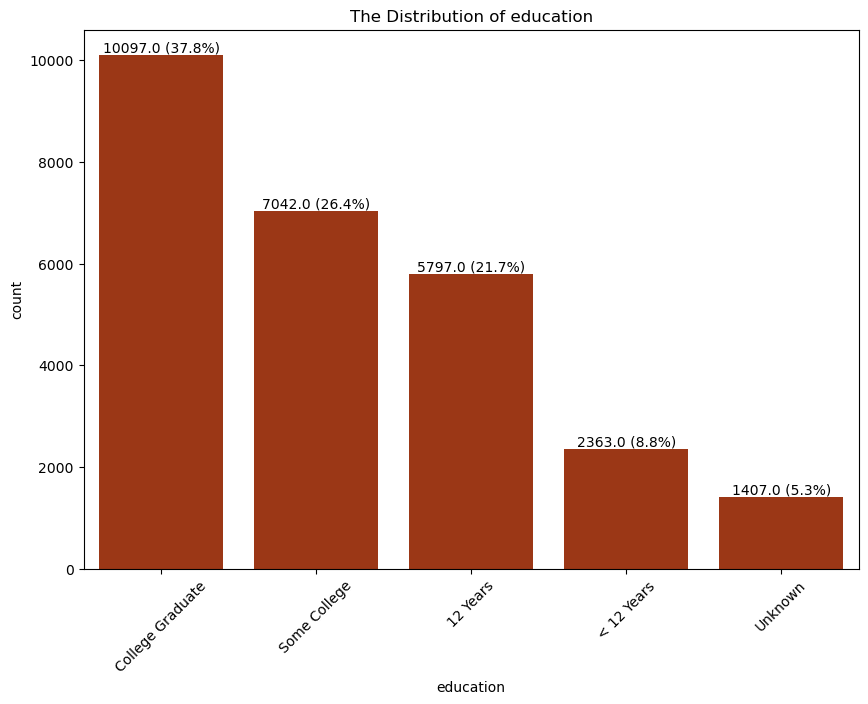

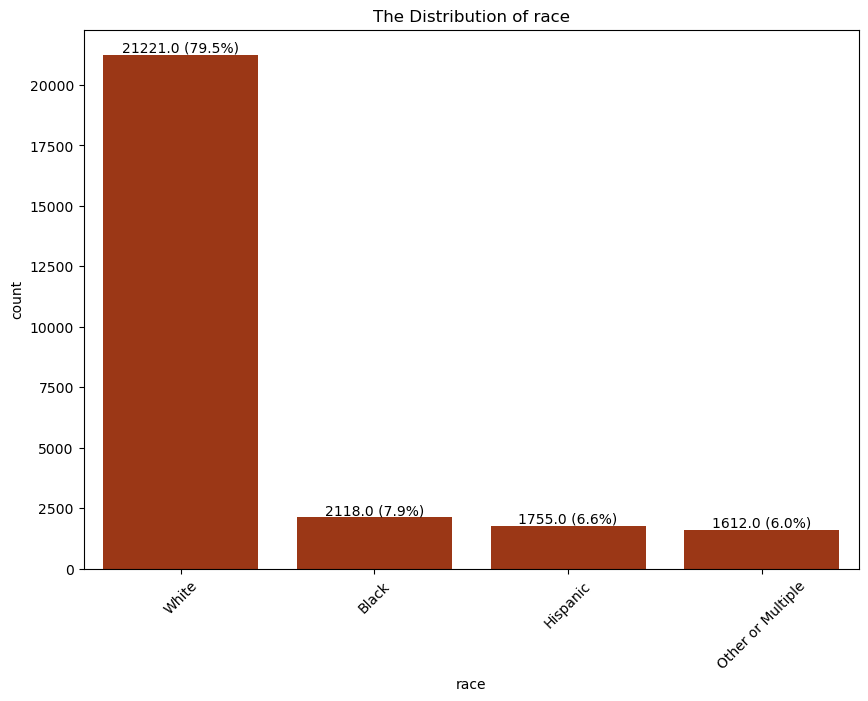

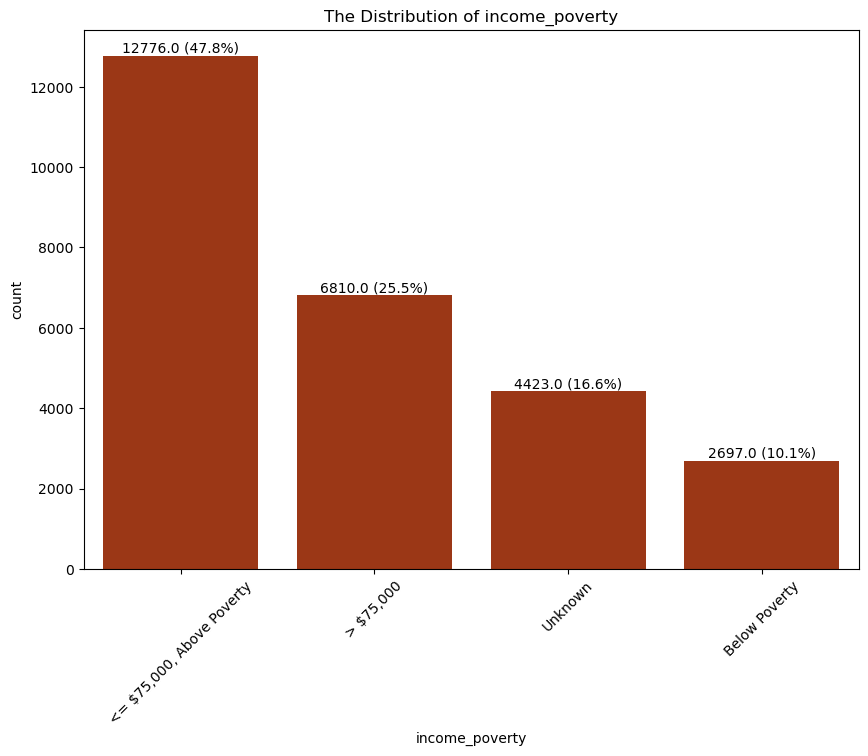

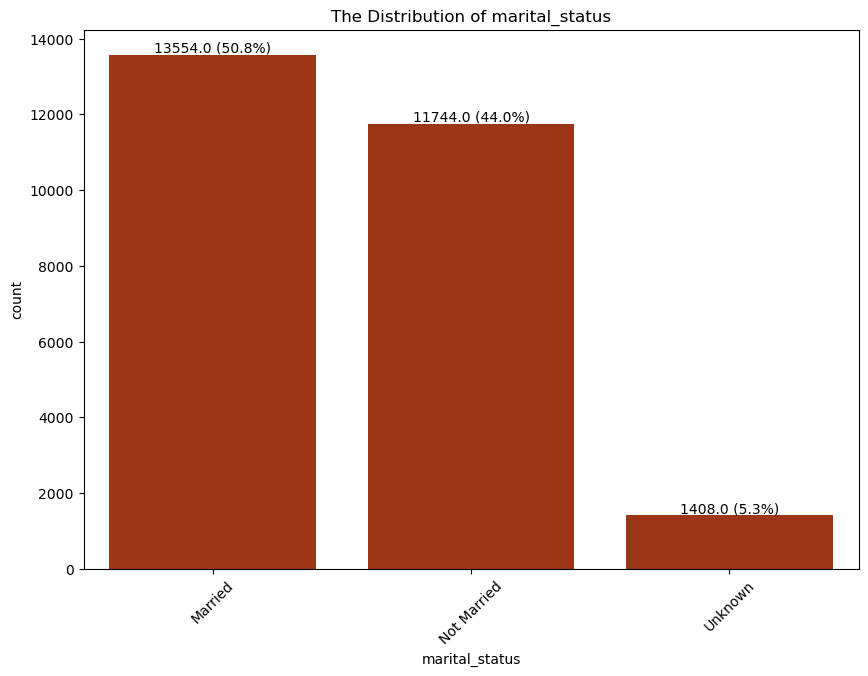

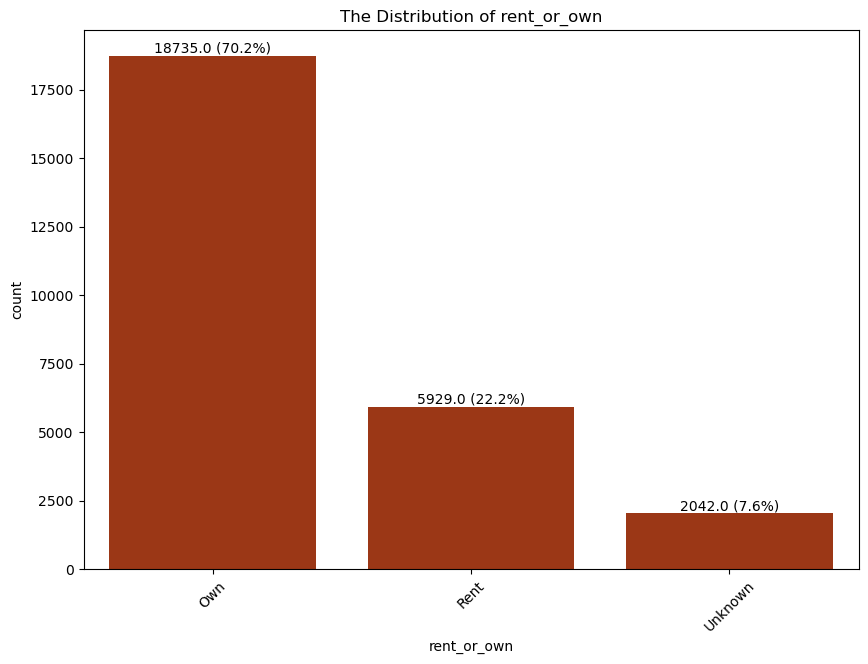

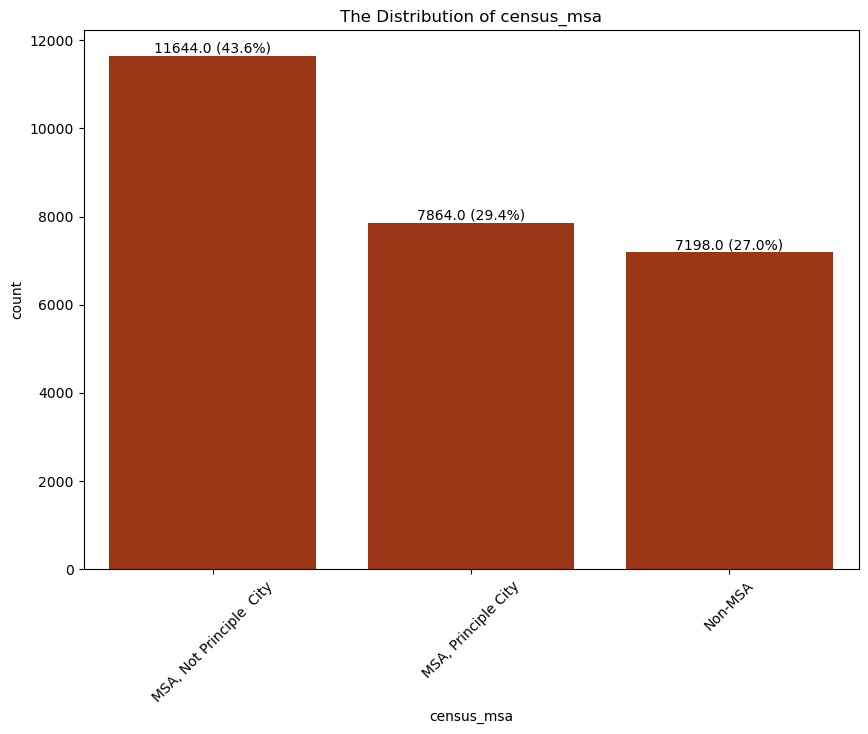

In [22]:
categorical_columns = ["age_group","education","race","income_poverty",
                    "marital_status","rent_or_own","census_msa"]

# Countplot of categorical columns with counts + percentages
for column in categorical_columns:
    plt.figure(figsize=(10,7))
    bargraph = sns.countplot(x=column, data=data, color = "#B12C00", order=data[column].value_counts().index)
    total = len(data)

    for y in bargraph.patches:
        count = y.get_height()
        percentage = f'{count/total:.1%}'
        bargraph.annotate(f'{count} ({percentage})', (y.get_x() + y.get_width()/2., count), ha='center', va='bottom')
    plt.title(f"The Distribution of {column}")
    plt.xticks(rotation=45)
    plt.show()



##### Observations of some of the Categorical Columns 
1. Age Group countplot shows that respondents aged 65 years and above (25.4%)  and 55-64 years (20.8%) were more represented compared to younger ones. 
2. Education countplot shows that majority of the respondents (37.5%) were college graduates,  suggesting a more educated sample.
3. The race countplot shows that the 79.5% of the  respondents were whites while the minority were black, hispanic and other races.
4. Income Poverty countplot shows that 47.8% respondents fall above the poverty line, earning $75000 per year, with 10.1% falling below  poverty and 25.5% earning above $75000.
5. Marital Status plot  shows that 50.8% were the majority, 44% unmarried while 5.3% did not disclose their status.
6. Rent or Own countplot:  70.2% were house owners, 22.2% of the respondents were renting while 5.3% did not disclose.
7. Employment Status: The plot shows that 50.8% were employed, 38.3% not in labour face, and  5.4% were unemployed.
8. Census_msa: The plot shows that most respondents live in metropolitan areas, mainly outside principal cities, while fewer are from rural regions.


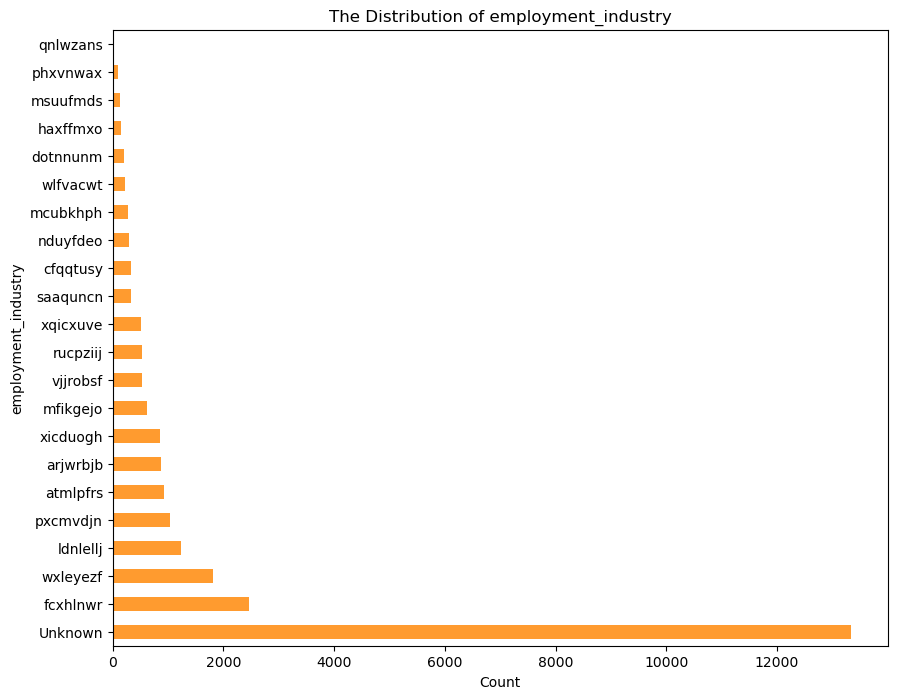

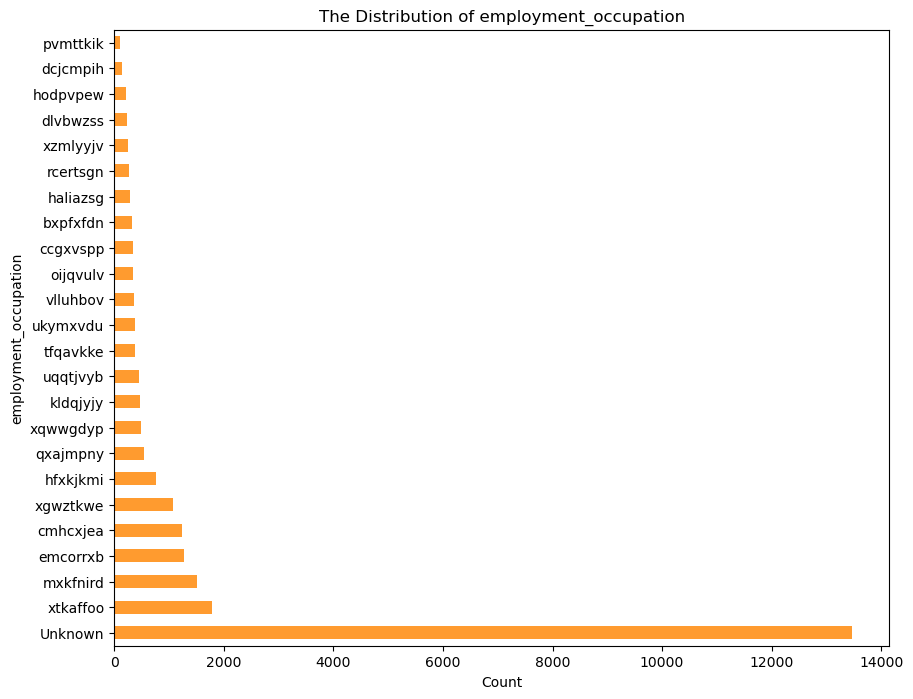

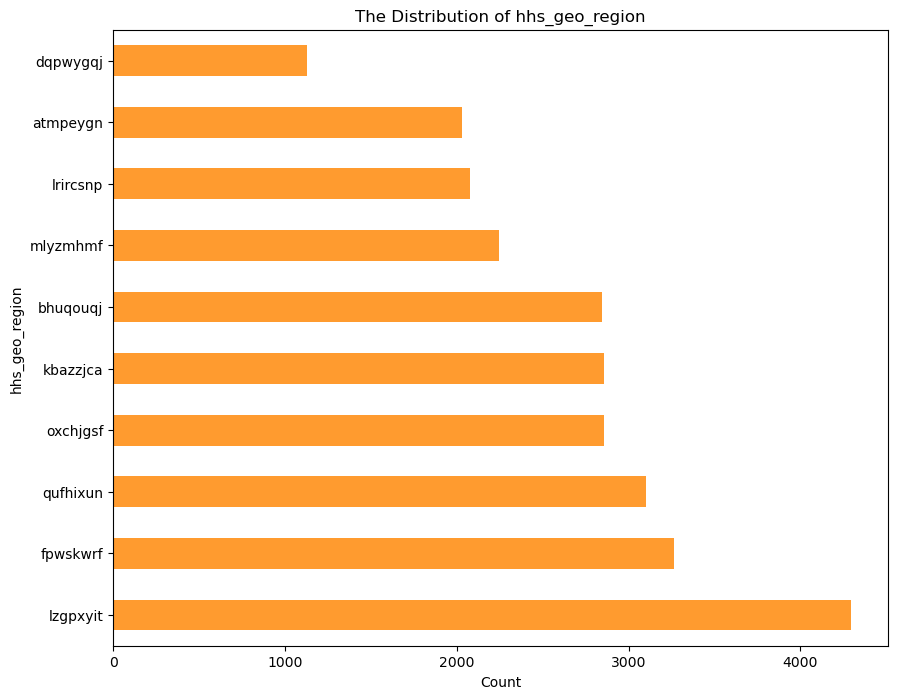

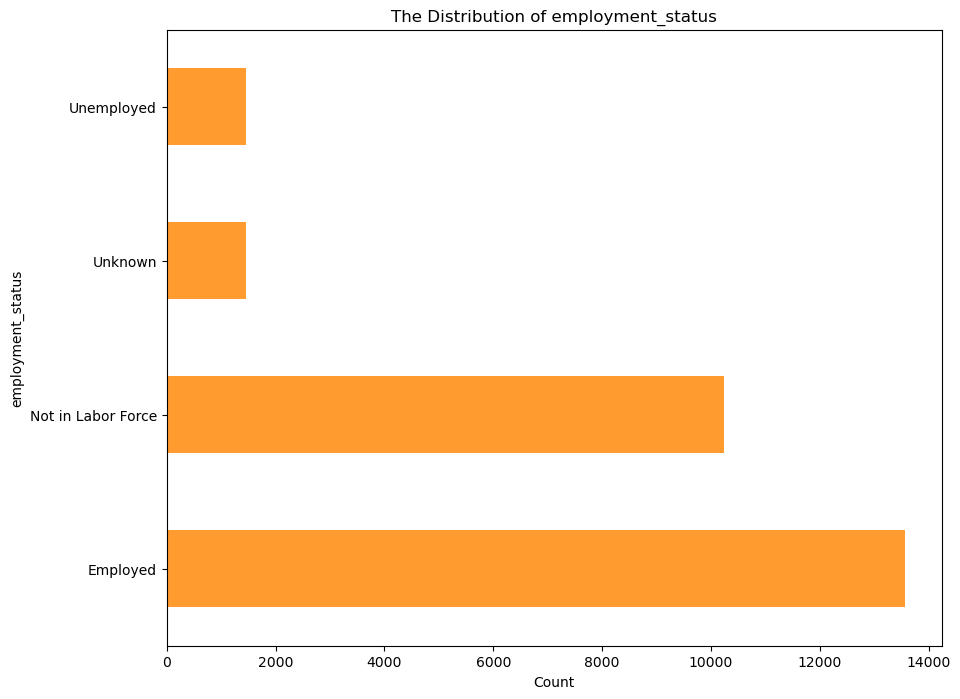

In [23]:
# A horizontal bar plot of the remaining categorical variables  
categorical2 = ["employment_industry","employment_occupation","hhs_geo_region","employment_status"]

for column in categorical2:
    plt.figure(figsize=(10,8))
    data[column].value_counts().plot(kind='barh', color="#FF9B2F")
    plt.title(f"The Distribution of {column}")
    plt.xlabel("Count")
    plt.ylabel(column)
    plt.show()

##### Observation
The categories in employment industry, employment occupation, and hhs_geo_region columns are anonymized with coded labels for privacy purposes. It is difficult to interpret them.

### 1.4.2 Bivariate Analysis

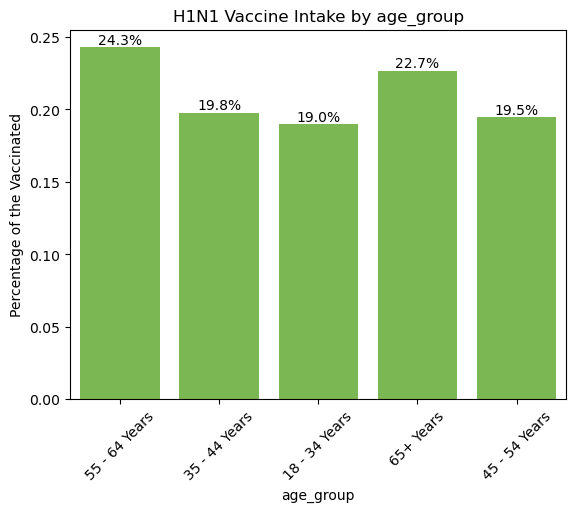

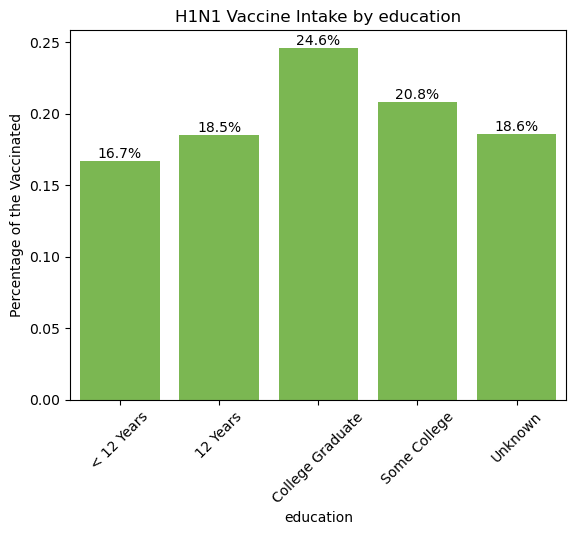

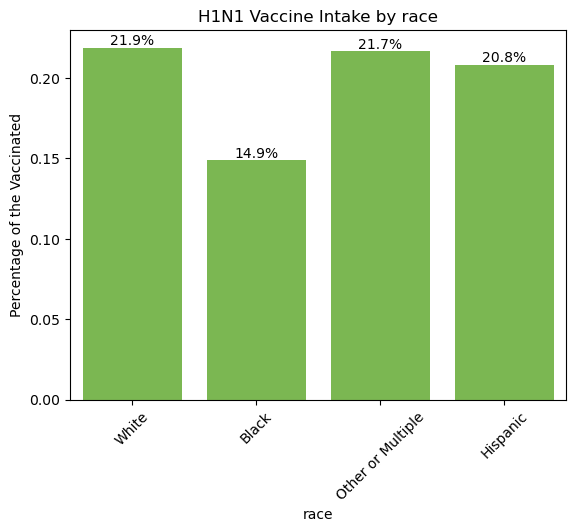

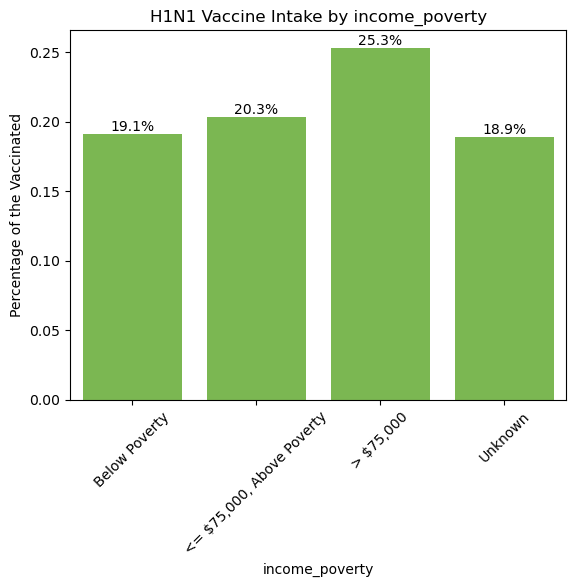

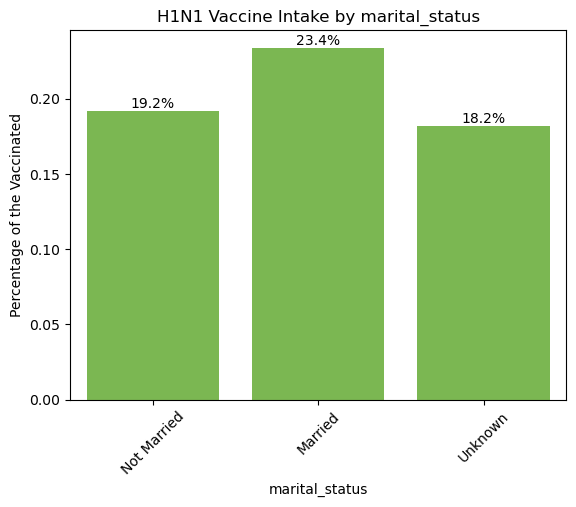

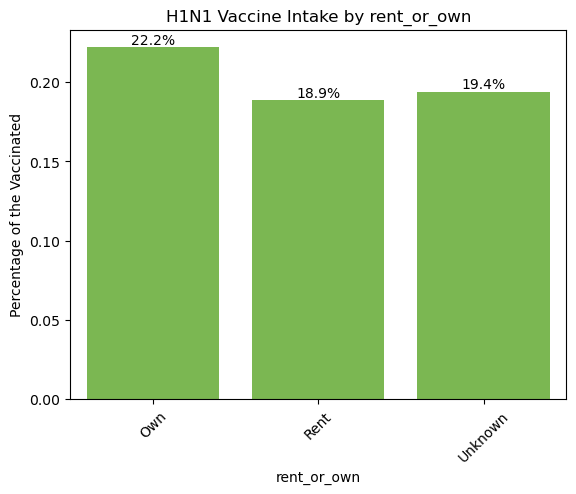

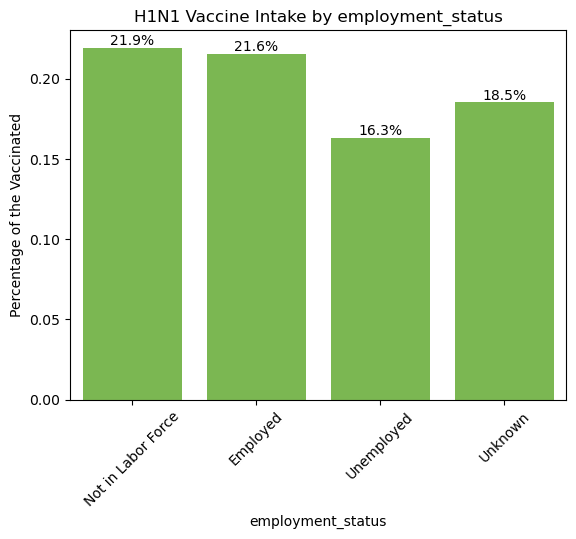

In [24]:
#Bivariate Analysis of the categorical columns versus H1N1 vaccine intake
for column in ["age_group","education","race","income_poverty", "marital_status","rent_or_own","employment_status"]:
    graph = sns.barplot(x=column, y="h1n1_vaccine", data=data, estimator=lambda x: sum(x)/len(x), errorbar=None, color = "#78C841")
    graph.set(title=f"H1N1 Vaccine Intake by {column}", ylabel="Percentage of the Vaccinated")
    for z in graph.patches: graph.annotate(f'{z.get_height():.1%}', (z.get_x()+z.get_width()/2., z.get_height()),ha='center', va='bottom')
    plt.xticks(rotation=45)
    plt.show()

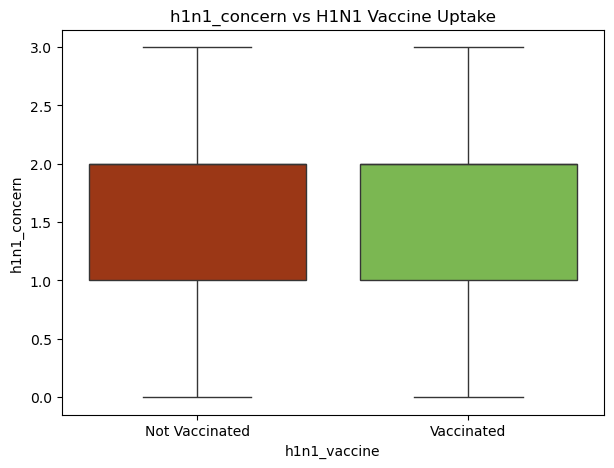

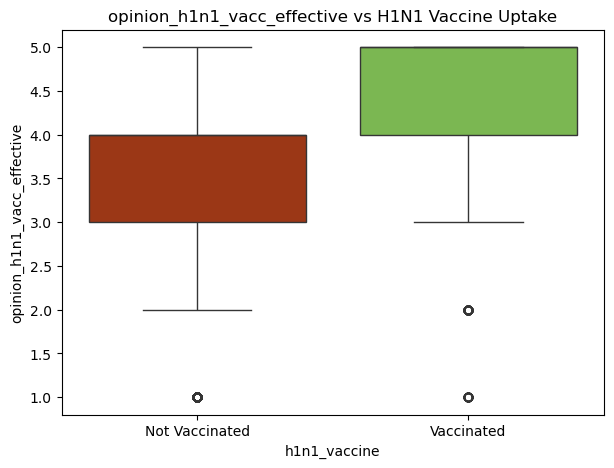

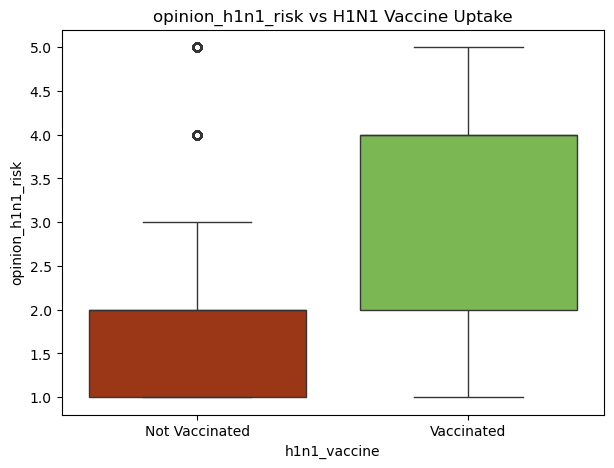

In [25]:

num_cols = [
    "h1n1_concern", "opinion_h1n1_vacc_effective", "opinion_h1n1_risk",]

for col in num_cols:
    plt.figure(figsize=(7,5))
    sns.boxplot(x="h1n1_vaccine", y=col, data=data, palette={"0": "#B12C00", "1": "#78C841"} )
    plt.title(f"{col} vs H1N1 Vaccine Uptake")
    plt.xticks([0,1], ["Not Vaccinated", "Vaccinated"])
    plt.show()


In [145]:
data.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

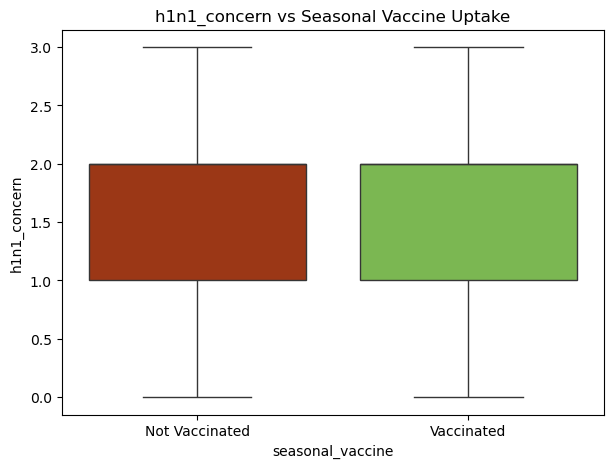

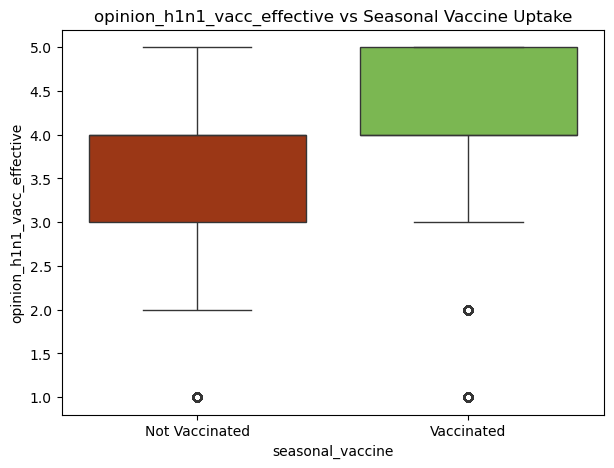

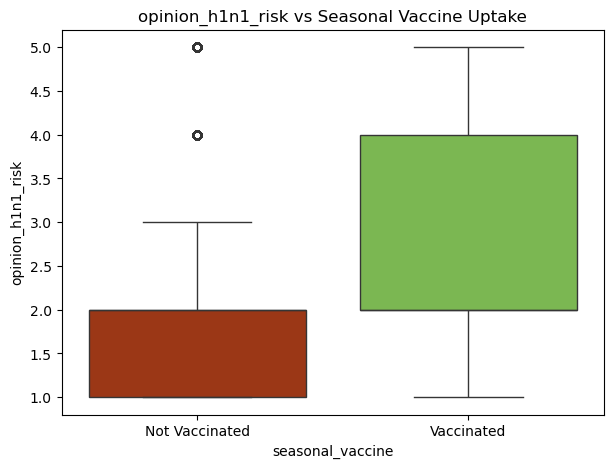

In [146]:
#Boxplot for behavioural variables and the H1N1 vaccine
numerical_cols = ["h1n1_concern", "h1n1_knowledge", "household_adults", "household_children"]

for col in num_cols:
    plt.figure(figsize=(7,5))
    sns.boxplot(x="seasonal_vaccine", y=col, data=data, palette={"0": "#B12C00", "1": "#78C841"} )
    plt.title(f"{col} vs Seasonal Vaccine Uptake")
    plt.xticks([0,1], ["Not Vaccinated", "Vaccinated"])
    plt.show()

In [ ]:
#Boxplot for behavioural variables and the H1N1 vaccine
num_cols = [
    "h1n1_concern", "opinion_h1n1_vacc_effective", "opinion_h1n1_risk",]

for col in num_cols:
    plt.figure(figsize=(7,5))
    sns.boxplot(x="h1n1_vaccine", y=col, data=data, palette={"0": "#B12C00", "1": "#78C841"} )
    plt.title(f"{col} vs H1N1 Vaccine Uptake")
    plt.xticks([0,1], ["Not Vaccinated", "Vaccinated"])
    plt.show()

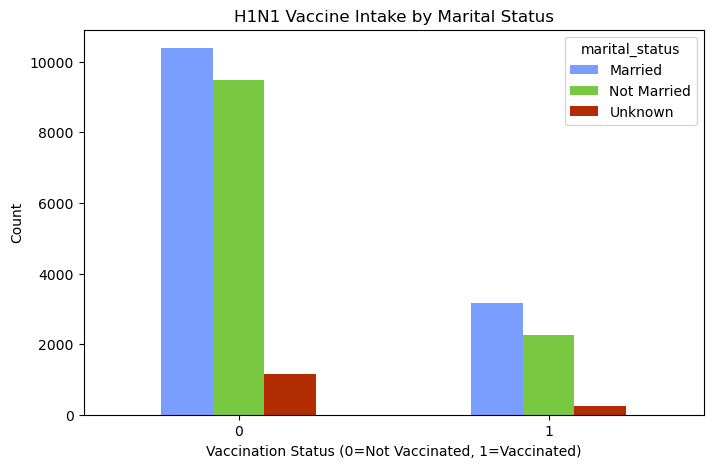

In [26]:
#A Crosstab of marital_status and H1N1 intake
pd.crosstab(data["h1n1_vaccine"], data["marital_status"]).plot(kind="bar", color=["#799EFF", "#78C841", "#B12C00"], figsize=(8,5))
plt.title("H1N1 Vaccine Intake by Marital Status")
plt.xlabel("Vaccination Status (0=Not Vaccinated, 1=Vaccinated)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

Observation: Married respondents had a slightly higher intake of the H1N1 vaccine compared to unmarried and the unknown groupundisclosed groups, though vaccination rates were  low across all categories compared to those people who were not vaccinated.

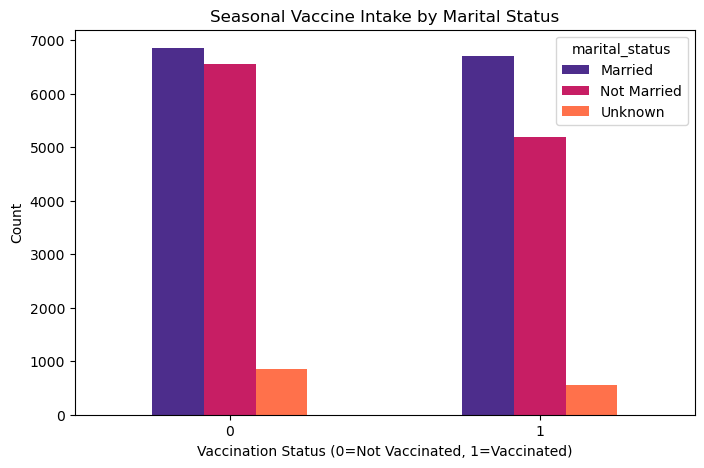

In [139]:
#A Crosstab of marital_status and Seasonal Vaccine intake
pd.crosstab(data["seasonal_vaccine"], data["marital_status"]).plot(kind="bar", color=["#4D2D8C", "#C71E64", "#FF714B"], figsize=(8,5))
plt.title("Seasonal Vaccine Intake by Marital Status")
plt.xlabel("Vaccination Status (0=Not Vaccinated, 1=Vaccinated)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

The dataset shows a fairly balanced distribution of seasonal vaccine uptake (53% not vaccinated versus 47% vaccinated).

In [144]:
seasonal_counts = data["seasonal_vaccine"].value_counts()
seasonal_counts

seasonal_vaccine
0    14271
1    12435
Name: count, dtype: int64

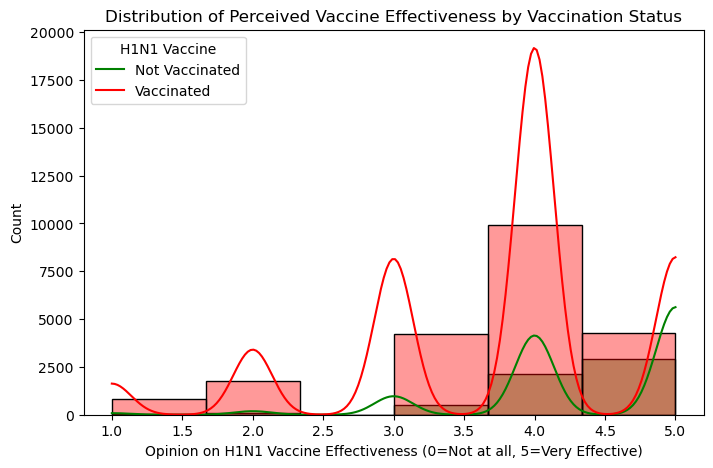

In [27]:
plt.figure(figsize=(8,5))

# Histogram with different colors for vaccine status
sns.histplot(data=data, x="opinion_h1n1_vacc_effective", hue="h1n1_vaccine", 
             bins=6, palette={0: "red", 1: "green"}, alpha=0.4, kde=True)

plt.title("Distribution of Perceived Vaccine Effectiveness by Vaccination Status")
plt.xlabel("Opinion on H1N1 Vaccine Effectiveness (0=Not at all, 5=Very Effective)")
plt.ylabel("Count")
plt.legend(title="H1N1 Vaccine", labels=["Not Vaccinated", "Vaccinated"])
plt.show()


People who perceived the H1N1 vaccine as more effective were much more likely to be vaccinated, while those who rated it as less effective were mostly unvaccinated.

### 1.4.3 Multivariate Analysis

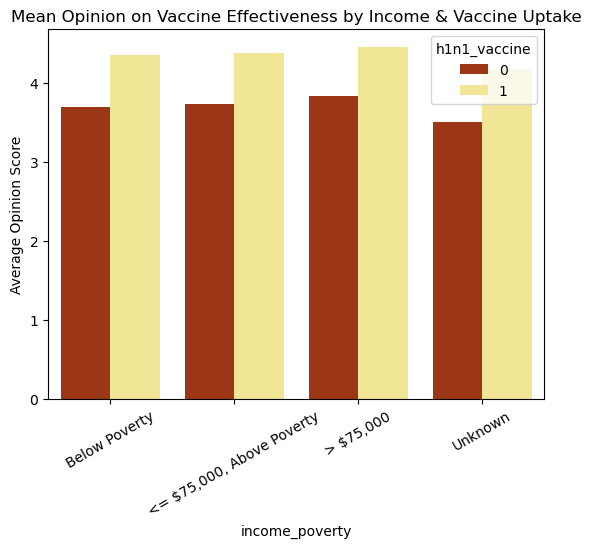

In [28]:
sns.barplot(
    x="income_poverty", 
    y="opinion_h1n1_vacc_effective", 
    hue="h1n1_vaccine", 
    data=data, 
    palette={0:"#B12C00", 1:"#FFF287"},
    ci=None
)
plt.title("Mean Opinion on Vaccine Effectiveness by Income & Vaccine Uptake")
plt.ylabel("Average Opinion Score")
plt.xticks(rotation=30)
plt.show()


Observations: Perceptions of vaccine effectiveness are decisive in vaccine uptake. Across all income levels, those who believe that the vaccine is effective are much more likely to receive it.

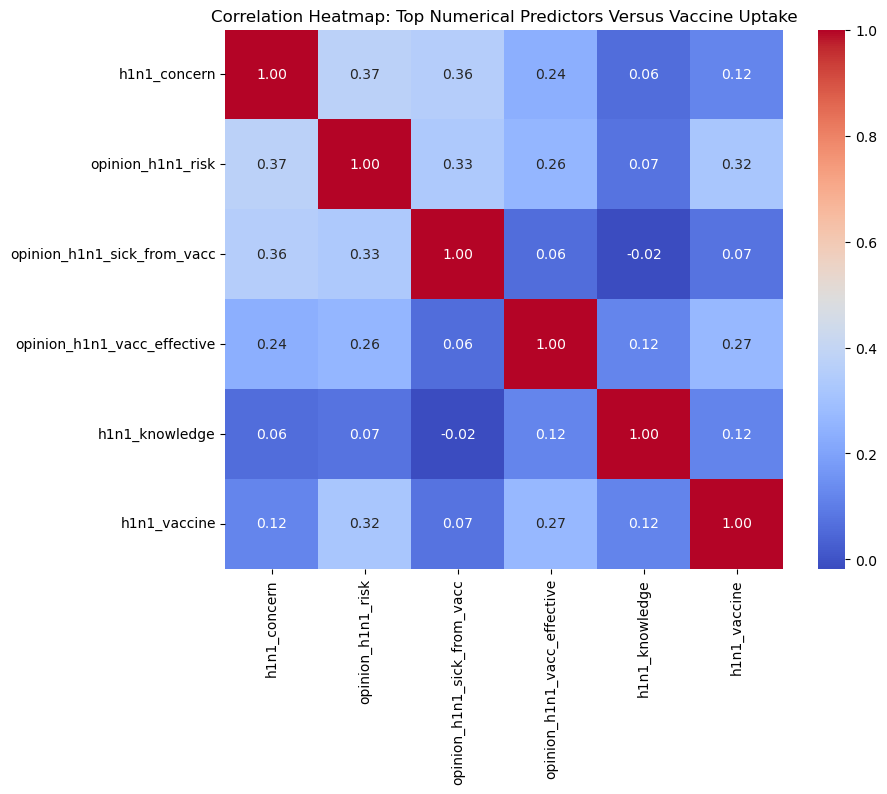

In [29]:
# A correlation Heatmap
numerical_columns =["h1n1_concern","opinion_h1n1_risk", "opinion_h1n1_sick_from_vacc","opinion_h1n1_vacc_effective", "h1n1_knowledge"]
corr = data[numerical_columns + ["h1n1_vaccine"]].corr()
plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm");
plt.title("Correlation Heatmap: Top Numerical Predictors Versus Vaccine Uptake")
plt.show()

Observation: Vaccine uptake shows the strongest positive association with perceived risk (0.32) and effectiveness (0.27).
Concern, knowledge, and the fear of getting some side effects have weak positive association.

## 1.5 Statistical Testing

###  1.5.1 Chi-Square Tests of Independence

In [30]:
categoricalcolumns = ["age_group","education","race","income_poverty", "marital_status","rent_or_own","employment_status"]
for column in categoricalcolumns:
    crosstab = pd.crosstab(data[column], data["h1n1_vaccine"])
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"{column}: Chi2={chi2:.2f}, p-value={p:.5f}")

age_group: Chi2=69.53, p-value=0.00000
education: Chi2=130.11, p-value=0.00000
race: Chi2=57.03, p-value=0.00000
income_poverty: Chi2=94.89, p-value=0.00000
marital_status: Chi2=75.13, p-value=0.00000
rent_or_own: Chi2=34.31, p-value=0.00000
employment_status: Chi2=31.22, p-value=0.00000


All the six sociodemographic factors tested were statistically significant predictors of H1N1 vaccine uptake since p < 0.001,  with education, income, and age showing the strongest associations.. Education, income,marital status and age showed the strongest influence, highlighting their key role in shaping the vaccination behavior.

## 1.6 Modeling

### 1.6.1 Data Preprocessing

In [31]:
data_ml = data.copy()

In [32]:
data_ml.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,Unknown,Unknown,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,Unknown,Unknown,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [33]:
#Defining Features and the Target
X = data_ml.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])  # Dropping target columns
y = data_ml['h1n1_vaccine'] #Target variable
X[:3]

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,Unknown,Unknown
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo


In [34]:
#Lets get into encoding by first identifying the categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
categorical_cols

Index(['health_insurance', 'age_group', 'education', 'race', 'sex',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [35]:
#Encode
X_coded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
print("The shape of encoded features:", X_coded.shape)

The shape of encoded features: (26706, 101)


In [36]:
#splitting/ separate train and test set
x_train, x_test, y_train, y_test = train_test_split(X_coded, y, test_size=0.2, random_state=42,stratify=y)
#check shape
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((21364, 101), (5342, 101), (21364,), (5342,))

In [37]:
h1n1_counts = data_ml["h1n1_vaccine"].value_counts()
print(h1n1_counts)

#Checking the class imbalance
h1n1_percentage = data_ml["h1n1_vaccine"].value_counts(normalize=True) * 100
print(h1n1_percentage.round(2))

h1n1_vaccine
0    21032
1     5674
Name: count, dtype: int64
h1n1_vaccine
0    78.75
1    21.25
Name: proportion, dtype: float64


H1N1 Class Imbalance Observation.

The h1n1_vaccine, which is the target variable is highly imbalanced, with 78.8% of the respondednts not vaccinated and 21.2% vaccinated.

The majority class is the not vaccinated class dominates. This class may cause the  to predict the majority class most of the time, and give us misleading accuracy.


Therefore, for this project, I will consider resampling techniques, including oversampling the minority class and ndersample the majority class. I will also use the Random Forest and evaluate models using F1-score, precision, recall and AUC.

### 1.6.2 Logistic Regression Model

In [38]:
lr_model= LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [39]:
#check prediction and accuracy

y_pred = lr_model.predict(x_test)

#accuracy
accuracy_score = accuracy_score(y_test, y_pred)
print(f" The accuracy is: {accuracy_score * 100:.2f}%")

 The accuracy is: 84.78%


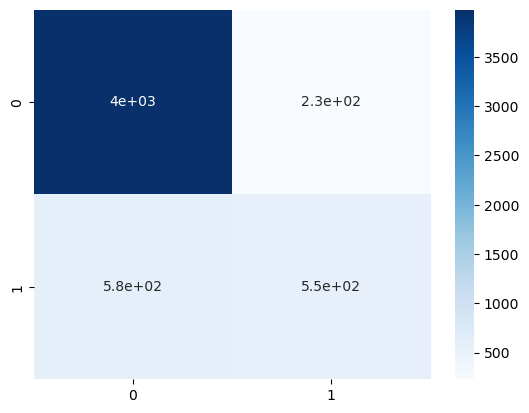

In [40]:
conf = confusion_matrix(y_test, y_pred)
sns.heatmap(conf, annot=True, cmap="Blues");

In [41]:
#Classification Report. 
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=2))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      4207
           1       0.71      0.49      0.58      1135

    accuracy                           0.85      5342
   macro avg       0.79      0.72      0.74      5342
weighted avg       0.84      0.85      0.84      5342



In [42]:
auc_score_lr = roc_auc_score(y_test, y_pred)
print(auc_score_lr)

0.7155147336775608


##### Logistic Regression Observations.

The Logistic Regression achieved an AUC of 71.55% indicating the model's ability to distinguish vaccinated vs. not vaccinated.
As shown above, there is a class imblance of 78.75% not vaccinated, 21.25% vaccinated, where the model tends to predict the majority class more often.
There is a precision of 0.87, recall 0.95, and F1-score of 0.91 for the majority class which is higher than that of the minority class.  
The AUC is more reliable than accuracy of 85% in this imbalanced dataset.

This model needs improvement to correctly identify vaccinated individuals.Therefore, to improve performance, I will consider resampling techniques including SMOTE and use models that handle imbalance such as Random Forest. 

### 1.6.3 Random Forest Model 

In [43]:
#instantiate the model
model_2 = RandomForestClassifier( n_estimators=100,random_state=42, class_weight="balanced")

#fitting the model
model_2.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [44]:
y_test = y_test.to_numpy()

In [45]:
#The y_pred
y_pred_rfc = model_2.predict(x_test)

accuracy_rfc = metrics.accuracy_score(y_test, y_pred_rfc) * 100
accuracy_rfc 

84.87457880943467

In [46]:
auc_rf = roc_auc_score(y_test, y_pred_rfc)
print(auc_rf)

0.6958431981939059


In [47]:
conf_matrix_rf = confusion_matrix(y_test, y_pred)
conf_matrix_rf

array([[3978,  229],
       [ 584,  551]])

In [48]:
#Classification report
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      4207
           1       0.75      0.43      0.55      1135

    accuracy                           0.85      5342
   macro avg       0.81      0.70      0.73      5342
weighted avg       0.84      0.85      0.83      5342



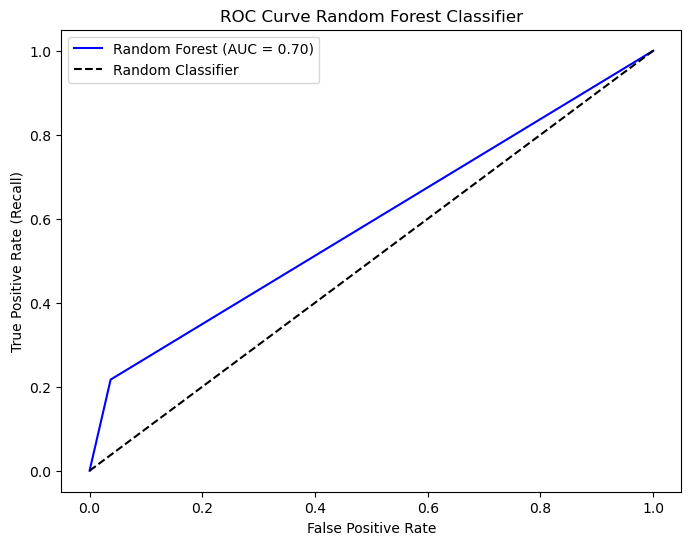

In [78]:
#ROC curve Random Forest Classifier
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rfc)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_rf:.2f})', color='blue')
plt.plot([0,1],[0,1],'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve Random Forest Classifier')
plt.legend()
plt.show()

Observation for the Random Forest Classifier:
The accuracy is 84.87%
The AUC is 69.58%
Classification Report:

Class 0 has a Precision 0.86, a Recall of 0.96 and an F1-score of 0.91
Class 1 has a Precision 0.75, a Recall of 0.43 and an F1-score of 0.55

The overall accuracy of 84.87% is high. However, the model still struggles to correctly identify vaccinated individuals. This s caused by the high class imbalance.

To improve minority class prediction,I will do a hyperparameter tuning.

### 1.6.4 XGBoost Model

In [50]:
#convert to numpy to remove the column names before training the model
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

#Instantiate the XGBoost model
model_3= XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=5,random_state=42,)
model_3.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [51]:
#y_pred
y_pred_xgb = model_3.predict(x_test)
print(y_pred_xgb)

[0 1 0 ... 0 0 0]


In [52]:
#accuracy
xgboost_accuracy = metrics.accuracy_score(y_test, y_pred) * 100
xgboost_accuracy

84.78098090602771

In [53]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4207
           1       0.71      0.49      0.58      1135

    accuracy                           0.85      5342
   macro avg       0.79      0.72      0.74      5342
weighted avg       0.84      0.85      0.84      5342



In [54]:
auc_xgb = roc_auc_score(y_test, y_pred_xgb)
print(auc_xgb)

0.7222272717277372


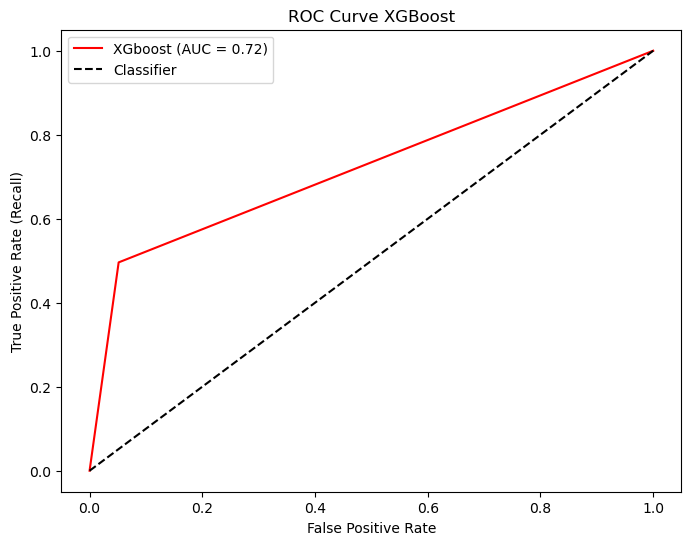

In [55]:
#ROC curve XGBoost
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'XGboost (AUC = {auc_xgb:.2f})', color='red')
plt.plot([0,1],[0,1],'k--', label='Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve XGBoost')
plt.legend()
plt.show()

Observation: The accuracy is 84.78% and an AUC of 59.83%.

Classification Report:

Class 0 has a Precision 0.87, a Recall of 0.95 and an F1-score of 0.91 
Class 1 has a Precision 0.71, a Recall of 0.0.49 and an F1-score of 0.58

The XGBoost model performs well overall with an accuracy of 84.78% but it struggles to capture vaccine-takers because of the low recall for Class 1.
Therefore, there is need for resampling or hyperparameter tuning to improve minority class prediction.

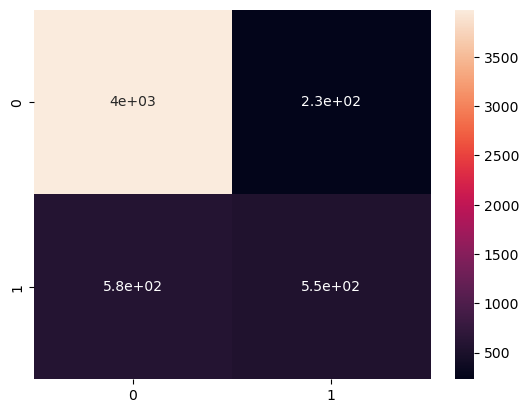

In [56]:
confusion_matrix_xgboost = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix_xgboost, annot=True);

### 1.6.5 Decision Tree Classifier 

In [57]:
#Instantiate the Decision Tree model
model_4 = DecisionTreeClassifier()
model_4.fit(x_train, y_train)

DecisionTreeClassifier()

In [58]:
#check y_pred
y_pred_dtc = model_4.predict(x_test)

In [59]:
#Checking the accuracy
accuracy_score_dtc = metrics.accuracy_score(y_test, y_pred_dtc) * 100
accuracy_score_dtc

77.96705353800075

In [60]:
auc_dt = roc_auc_score(y_test, y_pred_dtc)
print(auc_dt)

0.6928409646603259


In [61]:
#check confusion
conf_dtc = confusion_matrix(y_test, y_pred_dtc)
conf_dtc

array([[3550,  657],
       [ 520,  615]])

In [62]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4207
           1       0.48      0.54      0.51      1135

    accuracy                           0.78      5342
   macro avg       0.68      0.69      0.68      5342
weighted avg       0.79      0.78      0.78      5342



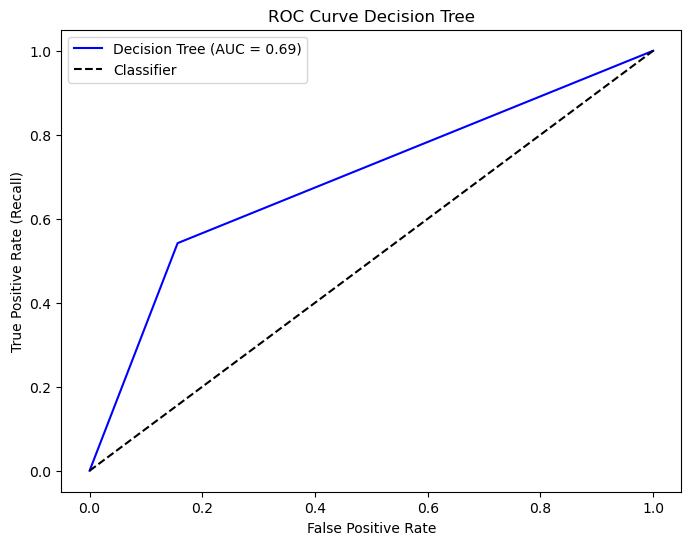

In [63]:
#ROC curve Decision Tree
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dtc)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {auc_dt:.2f})', color='blue')
plt.plot([0,1],[0,1],'k--', label='Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve Decision Tree')
plt.legend()
plt.show()

##### Observation
Accuracy score is 77.61%, the  AUC is 68.19%, which shows moderate overall performance.

Class 0, "not vaccinated" is predicted well, has a hifh recall of 0.87,recall 0.85, f1-score of 0.86 while class 1,'vaccinated' has lower precision of 0.48, recall of 0.52 and  and F1 of 0.50 indicating that many minority cases are missed.

The model handles the majority class better than the minority class; performance could improve with resampling or hyperparameter tuning.

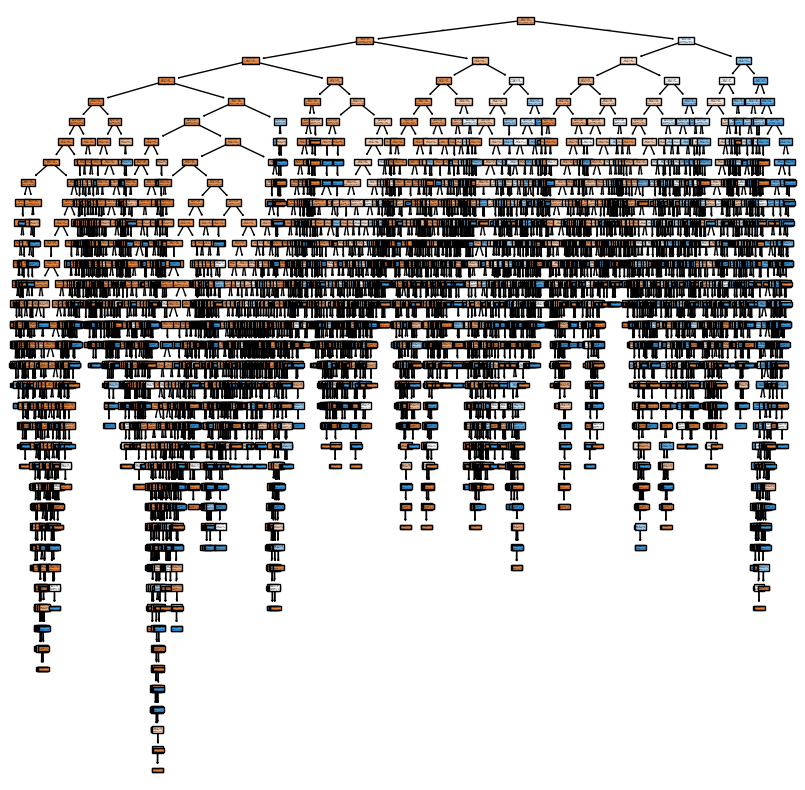

In [64]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plot_tree(model_4, filled=True) 
plt.show()

### 1.6.5 Hyperparameter Tuning H1N1 Vaccine

In [113]:
#Gridsearch cv

#params
param_grid = {"criterion": ["gini", "entropy"],
              "max_depth": [3, 5, 7, 8, None],
              "min_samples_split":[2, 5, 8, 10]
             }


#Instantiate gridsearch

grid_search = GridSearchCV(estimator= model_2, param_grid=param_grid, cv=5, scoring="accuracy")
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 8, None],
                         'min_samples_split': [2, 5, 8, 10]},
             scoring='accuracy')

In [115]:
#check best params
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 8}

In [ ]:
#recreate the model# assume we got the below result

In [116]:
#instantiate the model
model_2_tuning = RandomForestClassifier(
    n_estimators=100,          
    criterion='entropy',       
    max_depth=None,            
    min_samples_split=8,      
    class_weight="balanced",   
    random_state=42
)
#fitting the model
model_2_tuning.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       min_samples_split=8, random_state=42)

In [118]:
#The y_pred
y_pred_rfc_tuned = model_2_tuning.predict(x_test)
accuracy_rfc_tuned = metrics.accuracy_score(y_test, y_pred_rfc_tuned) * 100
accuracy_rfc_tuned 

77.49906402096593

In [119]:
#AUC
auc_rf_tuned = roc_auc_score(y_test, y_pred_rfc_tuned)
print(auc_rf_tuned)

0.7738841604234834


In [120]:
# Matrix Confusion
conf_matrix_rf_tuned = confusion_matrix(y_test, y_pred_rfc_tuned)
conf_matrix_rf_tuned

array([[2247,  592],
       [ 610, 1893]])

In [121]:
#Classification report
print(classification_report(y_test, y_pred_rfc_tuned))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      2839
           1       0.76      0.76      0.76      2503

    accuracy                           0.77      5342
   macro avg       0.77      0.77      0.77      5342
weighted avg       0.77      0.77      0.77      5342



###### Observations after Hyperparameter Tuning:H1N1 Vaccine 
Accuracy Score is 77.5  is good for a classification problem with potential class imbalance.

AUC score is 77.39% which indicates that the model can distinguish between vaccinated and non-vaccinated individuals fairly well.
Not vaccinated: Precision 0.79, Recall 0.79, F1-score 0.79

Vaccinated: Precision 0.76, Recall 0.76, F1-score 0.76

Both classes have similar precision, recall, and F1-scores, which is good because the model is not biased toward the majority class.


##### 

### 1.7.1 Data Preprocessing: Seasonal Vaccine

In [65]:
data_ml.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,Unknown,Unknown,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,Unknown,Unknown,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [66]:
#Defining Features and the Target
X_seasonal = data_ml.drop(columns=['h1n1_vaccine', 'seasonal_vaccine'])  # Dropping target columns
y_seasonal = data_ml['seasonal_vaccine'] #Target variable
X[:4]

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,Unknown,Unknown
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,Unknown,Unknown


In [67]:
#Checking the class imbalance
seasonal_counts = data_ml["seasonal_vaccine"].value_counts()
print(seasonal_counts)

seasonal_percentage = data_ml["seasonal_vaccine"].value_counts(normalize=True) * 100
print(seasonal_percentage.round(2))

seasonal_vaccine
0    14271
1    12435
Name: count, dtype: int64
seasonal_vaccine
0    53.44
1    46.56
Name: proportion, dtype: float64


##### Observation
 The seasonal vaccine dataset is relatively balanced, with 53.44% not vaccinated and 46.56% vaccinated. The model is less likely to be biased toward one class, and accuracy will be a more reliable metric. Standard models like Logistic Regression, Random Forest, XGBoost, and Decision Tree should perform reasonably well without heavy resampling.
Therefore, the balanced classes make it easier to train models that generalize well and produce interpretable results.

In [68]:
#splitting/ separate train and test set
x_train, x_test, y_train, y_test = train_test_split(X_coded,y_seasonal, test_size=0.2, random_state=42,stratify=y)
#check shape
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((21364, 101), (5342, 101), (21364,), (5342,))


### 1.7.2 Logistic Regression Model:Seasonal Vaccine

In [69]:
#Model
lr_seasonal_model= LogisticRegression()
lr_seasonal_model.fit(x_train, y_train)

LogisticRegression()

In [70]:
#check prediction and accuracy

y_pred_seasonal = lr_seasonal_model.predict(x_test)

In [73]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

#accuracy
accuracy_score_slr = accuracy_score(y_test, y_pred)

In [74]:
print(f" The accuracy is: {accuracy_score_slr * 100:.2f}%")

 The accuracy is: 61.83%



Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80      2839
           1       0.78      0.75      0.76      2503

    accuracy                           0.78      5342
   macro avg       0.78      0.78      0.78      5342
weighted avg       0.78      0.78      0.78      5342



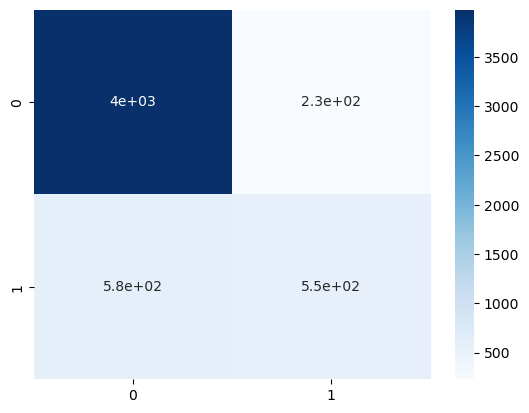

In [75]:
conf_seasonal = confusion_matrix(y_test, y_pred_seasonal)
sns.heatmap(conf, annot=True, cmap="Blues");

#Classification Report. 
print("\nClassification Report:\n", classification_report(y_test, y_pred_seasonal, digits=2))

In [76]:
#AUC_Seasonal
auc_score_slr = roc_auc_score(y_test, y_pred_seasonal)
print(auc_score_slr)

0.7793993456531275


##### Observation for Logistic Regression: Seasonal
The model achieved an accuracy of 61.83% and an AUC of 77.93%, indicating good ability to distinguish vaccinated from non-vaccinated individuals. Class-wise metrics show balanced performance:

Not vaccinated: Precision 0.79, Recall 0.81, F1-score 0.80

Vaccinated: Precision 0.78, Recall 0.75, F1-score 0.76

Overall, the model performs reasonably well for both classes, with slightly better performance for the majority class.


### 1.7.2 Random Forest Model-Seasonal

In [79]:
#instantiate the model
model2_seasonal = RandomForestClassifier( n_estimators=100,random_state=42, class_weight="balanced")
#fitting the model
model2_seasonal.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [83]:
#The y_pred
y_pred_rfc_seasonal = model2_seasonal.predict(x_test)

accuracy_rfc_seasonal = metrics.accuracy_score(y_test, y_pred_rfc) * 100
accuracy_rfc_seasonal 

61.3253463122426

In [84]:
auc_rf_seasonal = roc_auc_score(y_test, y_pred_rfc_seasonal)
print(auc_rf_seasonal)

0.7706465520698866


In [85]:
conf_matrix_rf_seasonal = confusion_matrix(y_test, y_pred_rfc_seasonal)
conf_matrix_rf_seasonal

array([[2291,  548],
       [ 665, 1838]])

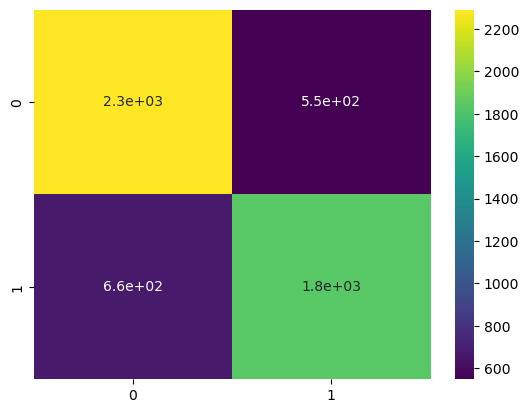

In [100]:
sns.heatmap(conf_matrix_rf_seasonal, annot=True, cmap="viridis");

In [86]:
#Classification report
print(classification_report(y_test, y_pred_rfc_seasonal))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79      2839
           1       0.77      0.73      0.75      2503

    accuracy                           0.77      5342
   macro avg       0.77      0.77      0.77      5342
weighted avg       0.77      0.77      0.77      5342



##### Observations
Accuracy = 61.3253%
AUC= 77.06%
The model shows good ability to distinguish vaccinated from non-vaccinated individuals.
The precision is 0.78, recall is 0.81 and f1_score is 0.79 for class 0(Not vaccinated) while precision is 0.77,  recall is 0.73 and  f1_score is 0.75. 

In summary, the model performs fairly well for both classes, with slightly better performance for the majority class (Not Vaccinated Class).

### 1.7.3 XGBoost Model- Seasonal

In [88]:
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

In [89]:
#Instantiate the XGBoost model
model3_seasonal = XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=5,random_state=42,)
model3_seasonal.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [90]:
#y_pred
y_pred_xgb_seasonal = model_3.predict(x_test)
print(y_pred_xgb_seasonal)

[0 1 0 ... 0 0 0]


In [91]:
#accuracy
xgboost_accuracy_seasonal = metrics.accuracy_score(y_test, y_pred_xgb_seasonal) * 100
xgboost_accuracy_seasonal

62.01797079745413

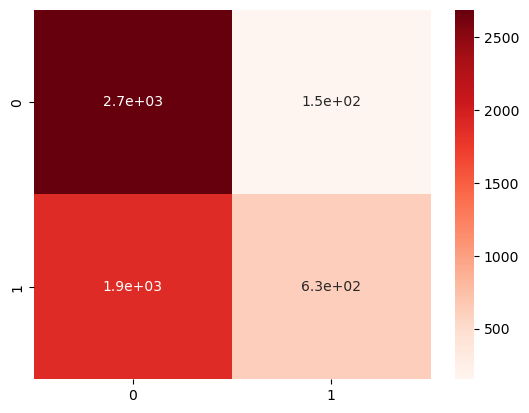

In [102]:
confusion_matrix_xgboost_seasonal = confusion_matrix(y_test, y_pred_xgb_seasonal)
sns.heatmap(confusion_matrix_xgboost_seasonal, annot=True, cmap="Reds");

In [92]:
print(metrics.classification_report(y_test, y_pred_xgb_seasonal))

              precision    recall  f1-score   support

           0       0.59      0.95      0.73      2839
           1       0.80      0.25      0.38      2503

    accuracy                           0.62      5342
   macro avg       0.70      0.60      0.55      5342
weighted avg       0.69      0.62      0.56      5342



In [93]:
#AUC 
auc_xgb_seasonal = roc_auc_score(y_test, y_pred_xgb_seasonal)
print(auc_xgb_seasonal)


0.5983035925751374


##### XGBoost observations-Seasonal Vaccine
Accuracy = 62.02% 
AUC= 59.83% 
These scores indicate the  ability of the model to distinguish vaccinated from non-vaccinated individuals. 

The Class-wise metrics reveal a strong bias toward the majority class as shown by the following scores. 

Not vaccinated: Precision 0.59, Recall 0.95, F1-score 0.73

Vaccinated: Precision 0.80, Recall 0.25, F1-score 0.38

XGBoost predicts the majority class very well but struggles with the minority class (vaccinated), leading to low recall and F1-score for that group.

### 1.7.4 Decision Tree Classifier-Seasonal

In [94]:
#Instantiate the Decision Tree model
model4_seasonal = DecisionTreeClassifier()
model4_seasonal.fit(x_train, y_train)

DecisionTreeClassifier()

In [95]:
#check y_pred
y_pred_dtc_seasonal = model4_seasonal.predict(x_test)

In [96]:
#Checking the accuracy
accuracy_score_dtc_seasonal = metrics.accuracy_score(y_test, y_pred_dtc_seasonal) * 100
accuracy_score_dtc_seasonal

68.73830026207412

In [97]:
#Check the AUC
auc_dt_seasonal = roc_auc_score(y_test, y_pred_dtc_seasonal)
print(auc_dt_seasonal)

0.68588127498147


In [98]:
#Confusion Matrix
conf_dtc_seasonal = confusion_matrix(y_test, y_pred_dtc_seasonal)
conf_dtc_seasonal

array([[2015,  824],
       [ 846, 1657]])

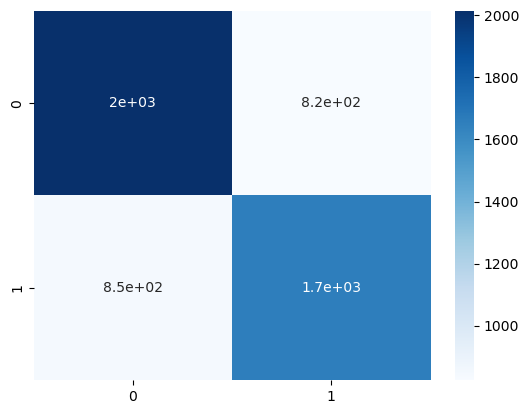

In [104]:
sns.heatmap(conf_dtc_seasonal, annot=True, cmap="Blues");

In [99]:
print(classification_report(y_test, y_pred_dtc_seasonal))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      2839
           1       0.67      0.66      0.66      2503

    accuracy                           0.69      5342
   macro avg       0.69      0.69      0.69      5342
weighted avg       0.69      0.69      0.69      5342



Decision Tree Accuracy =68.74% 
AUC= 68.59% 

The model has the ability to distinguish vaccinated from non-vaccinated individuals. 
Class-wise statistics are fairly balanced:

Not vaccinated: Precision 0.70, Recall 0.71, F1-score 0.71

Vaccinated: Precision 0.67, Recall 0.66, F1-score 0.66

The Decision Tree performs evenly for both classes, though performance is slightly better for the majority class.

### 1.7.5 Hyperparameter Tuning Seasonal Vaccine

In [122]:
#Gridsearch cv
#Used Decision Tree Model since it had the highest accuracy score

#params
param_grid = {"criterion": ["gini", "entropy"],
              "max_depth": [3, 5, 7, 8, None],
              "min_samples_split":[2, 5, 8, 10]
             }

#Instantiate gridsearch
grid_search_seasonal = GridSearchCV(estimator= model4_seasonal, param_grid=param_grid, cv=5, scoring="accuracy")
grid_search_seasonal.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 8, None],
                         'min_samples_split': [2, 5, 8, 10]},
             scoring='accuracy')

In [123]:
#check best params
grid_search_seasonal.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 8}

In [124]:
model_seasonal_tuning = RandomForestClassifier(
    n_estimators=100,          
    criterion='entropy',
    max_depth=7,
    min_samples_split=8,
    class_weight="balanced",  
    random_state=42
)
model_seasonal_tuning.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, min_samples_split=8, random_state=42)

In [125]:
#check y_pred after hyper parameter tuning
y_pred_dtc_seasonal_tuned = model_seasonal_tuning.predict(x_test)

In [126]:
#Checking the accuracy
accuracy_score_dtc_seasonal_tuned = metrics.accuracy_score(y_test, y_pred_dtc_seasonal_tuned) * 100
accuracy_score_dtc_seasonal_tuned

76.61924372894046

In [127]:
#Check the AUC
auc_dt_seasonal_tuned = roc_auc_score(y_test, y_pred_dtc_seasonal_tuned)
print(auc_dt_seasonal_tuned)

0.7645427107759523


In [128]:
#Confusion Matrix
conf_dtc_seasonal_tuned = confusion_matrix(y_test, y_pred_dtc_seasonal_tuned)
conf_dtc_seasonal_tuned

array([[2245,  594],
       [ 655, 1848]])

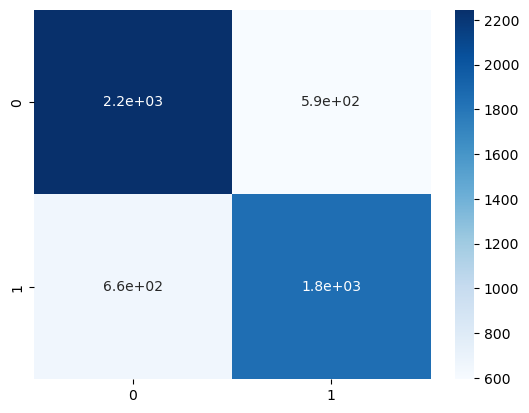

In [133]:
sns.heatmap(conf_dtc_seasonal_tuned, annot=True, cmap="Blues");

In [134]:
print(classification_report(y_test, y_pred_dtc_seasonal_tuned))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      2839
           1       0.76      0.74      0.75      2503

    accuracy                           0.77      5342
   macro avg       0.77      0.76      0.76      5342
weighted avg       0.77      0.77      0.77      5342



##### Observations After HyperParameter Tuning:Seasonal Vaccine. 
Accuracy score is 76.62% and the AUC is 76.45% are good for a model predicting vaccination behavior with class imbalance.

Not vaccinated: Precision 0.77, Recall 0.79, F1-score 0.78

Vaccinated: Precision 0.76, Recall 0.74, F1-score 0.75

In summary, the model performs fairly well for both classes, though slightly better at predicting the “Not vaccinated” class.

In regards to the class Metrics, the recall is slightly lower for the “Vaccinated” class (0.74) which means that the model misses a few vaccinated cases. Further, the F1-scores are reasonably balanced, indicating a good trade-off between precision and recall.

## 1.8 Testing the Models

In [135]:
# Replace with your actual file path
submission_file = pd.read_csv("test_set_features.csv")
submission_file.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


## 1.9 Conclusion 

This analysis highlights the multifaceted nature of vaccine uptake for both H1N1 and seasonal flu, emphasizing the influence of demographic, social, and behavioral factors. Using Random Forest models on the 2009 H1N1 Flu Survey data, we successfully predicted vaccination behavior, achieving strong metrics including accuracy, precision, recall, and F1-score.

Key Findings:

1.Demographic Factors: Age, education, and income were significant predictors of both H1N1 and seasonal flu vaccination. Certain age groups and higher education levels showed a greater likelihood of getting vaccinated.
2. Behavioral Patterns: Individuals who practiced preventive behaviors, such as frequent handwashing, avoiding large gatherings, and wearing face masks, were more likely to receive vaccinations.

3. Opinion-Based Influences: Concern about contracting H1N1 or seasonal flu and receiving recommendations from healthcare providers were among the strongest predictors of vaccine uptake.
4.  Random Forest models captured complex interactions between demographic, behavioral, and opinion features effectively. Hyperparameter tuning enhanced predictive performance, and feature importance analysis highlighted the variables most influential in vaccination decisions.

5 Insights from the analysis suggest that targeted vaccination campaigns focusing on specific age groups, educational backgrounds, and individuals with higher perceived flu risk can improve vaccine coverage. Emphasizing doctor recommendations and raising awareness of flu risks may further increase uptake.

In summary, the findings indicate that understanding the underlying factors driving vaccine uptake is essential. Health organizations can use these insights to design targeted interventions that address specific community concerns and barriers, ultimately improving vaccination rates and public health outcomes

## 1.10 Recommendations 

1. Health organizations should focus the campaigns on age, education, or income groups with lower vaccination rates.

2. Emphasize Doctor Recommendations- Disaster Management organizations should use healthcare providers to encourage people to take vaccines.

3. Highlight the need for  handwashing, mask-wearing, and other protective actions linked to higher vaccination.

4. IEducate the public on the risks of H1N1 and seasonal flu to motivate vaccination.

5. Use predictive models to track vaccination trends and identify emerging groups with low uptake, enabling timely and targeted interventions.